## Examen SQL: Sistema de Gestión de una Tienda de Electrónica


**Código de inicialización**

Este código permite inicializar las bibliotecas para usar SQLite en la máquina virtual de Google Colab. Además, elimina cualquier dato almacenado anteriormente en el archivo `tienda.db`. Es recomendable volver a ejecutar el código cada vez que se comience con la resolución de un nuevo ejercicio.



### Ejercicios:

**Creación de Tablas**:
1. Define las siguientes tablas usando sentencias SQL:
   - **Producto**: Campos `id_producto` (clave primaria), `nombre`, `marca`, `precio`, `stock` y `fecha_ingreso`.
   - **Cliente**: Campos `id_cliente` (clave primaria), `nombre`, `direccion`, `telefono` y `correo_electronico`.
   - **Venta**: Campos `id_venta` (clave primaria), `id_cliente` (clave foránea), `id_producto` (clave foránea), `cantidad`, `fecha_venta` y `total`.



**Enunciado:**

Estás encargado de diseñar una base de datos para una tienda de electrónica, con el objetivo de gestionar eficientemente la información sobre los productos, las ventas y los clientes. La base de datos debe contener tablas que representen los productos, los clientes y las transacciones de ventas, además de las relaciones entre estas entidades.


2. **DBML del Esquema de Tablas**: Genera el código DBML del diseño de las tablas anteriores utilizando [dbdiagram.io](https://dbdiagram.io). Asegúrate de incluir todas las relaciones y restricciones.


3. **Carga de Datos**: Inserta datos de ejemplo: al menos 6 productos, 4 clientes y 10 registros de ventas en las tablas correspondientes.


**Consultas SQL**:

4. **Listado de Productos**: Muestra todos los productos disponibles ordenados por precio en forma ascendente.

5. **Clientes con Compras Altas**: Lista los clientes que hayan realizado una compra con un total mayor a 500. Incluye `id_cliente`, `nombre` y `total`.

6. **Ventas Recientes**: Muestra las últimas 5 ventas realizadas. Incluye `id_venta`, `fecha_venta`, `id_producto`, `cantidad` y `total`.

7. **Productos con Bajo Stock**: Muestra los productos cuyo stock sea menor a 10 unidades. Incluye `id_producto`, `nombre`, `stock` y `precio`.

8. **Ventas por Cliente**: Muestra el total de ventas realizadas por cada cliente, ordenado de mayor a menor. Incluye `id_cliente`, `nombre` y `total_ventas`.

9. **Ventas Totales por Producto**: Calcula el número total de unidades vendidas por cada producto. Incluye `id_producto`, `nombre` y `total_vendido`.

10. **Productos Más Vendidos**: Lista los productos que han sido vendidos en más de 3 transacciones distintas.


**Código de inicialización**

In [1]:
!pip install pymysql
!pip install ipython-sql "sqlalchemy<2.0"
%load_ext sql
!rm -rf tienda.db
%sql sqlite:///tienda.db

Define las siguientes tablas usando sentencias SQL:
Producto: Campos id_producto (clave primaria), nombre, marca, precio, stock y fecha_ingreso.
Cliente: Campos id_cliente (clave primaria), nombre, direccion, telefono y correo_electronico.
Venta: Campos id_venta (clave primaria), id_cliente (clave foránea), id_producto (clave foránea), cantidad, fecha_venta y total.

In [2]:
%%sql
CREATE TABLE Producto (
    id_producto INT PRIMARY KEY,
    nombre VARCHAR(100) NOT NULL,
    marca VARCHAR(100) NOT NULL,
    precio DECIMAL(10, 2) NOT NULL,
    stock INT NOT NULL,
    fecha_ingreso DATE NOT NULL);

CREATE TABLE Cliente (
    id_cliente INT PRIMARY KEY,
    nombre VARCHAR(100) NOT NULL,
    direccion VARCHAR(255),
    telefono VARCHAR(15),
    correo_electronico VARCHAR(100));

CREATE TABLE Venta (
    id_venta INT PRIMARY KEY,
    id_cliente INT NOT NULL,
    id_producto INT NOT NULL,
    cantidad INT NOT NULL,
    fecha_venta DATE NOT NULL,
    total DECIMAL(10, 2) NOT NULL,
    FOREIGN KEY (id_cliente) REFERENCES Cliente (id_cliente),
    FOREIGN KEY (id_producto) REFERENCES Producto (id_producto));

 * sqlite:///ejemplos.db
Done.
Done.
Done.


[]

2- DBML del Esquema de Tablas: Genera el código DBML del diseño de las tablas anteriores utilizando dbdiagram.io. Asegúrate de incluir todas las relaciones y restricciones.

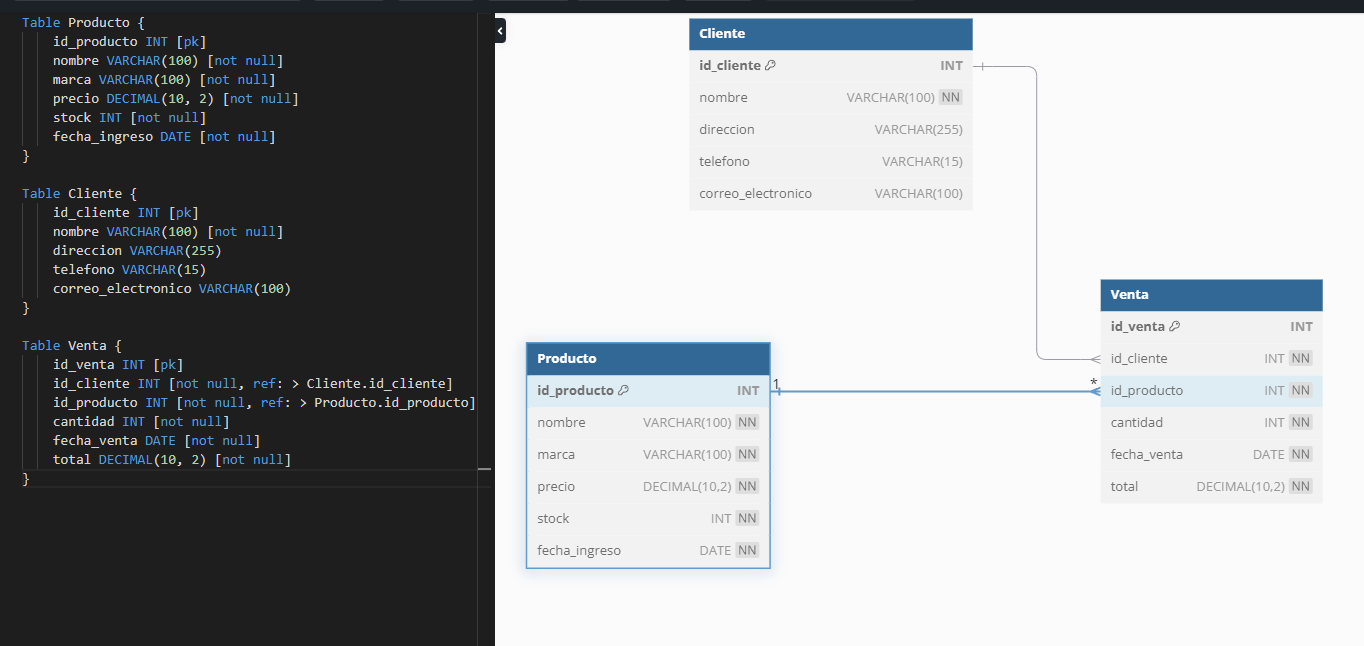

3- Carga de Datos: Inserta datos de ejemplo: al menos 6 productos, 4 clientes y 10 registros de ventas en las tablas correspondientes.

In [3]:
%%sql
INSERT INTO Producto (id_producto, nombre, marca, precio, stock, fecha_ingreso)
VALUES
(1, 'Smartphone', 'Samsung', 300, 15, '2024-11-01'),
(2, 'Laptop', 'Dell', 800, 10, '2024-11-05'),
(3, 'Tablet', 'Apple', 400, 8, '2024-11-10'),
(4, 'Smartwatch', 'Garmin', 250, 20, '2024-11-12'),
(5, 'Televisor', 'LG', 1200, 5, '2024-11-15'),
(6, 'Auriculares', 'Sony', 150, 50, '2024-11-20');

INSERT INTO Cliente (id_cliente, nombre, direccion, telefono, correo_electronico)
VALUES
(1, 'Carlos López', 'Calle Falsa 123', '123456789', 'carlos@gmail.com'),
(2, 'María Pérez', 'Av. Real 456', '987654321', 'maria@gmail.com'),
(3, 'Luis Gómez', 'Plaza Central 789', '555123456', 'luis@gmail.com'),
(4, 'Ana Torres', 'Calle Luna 321', '444987654', 'ana@gmail.com');

INSERT INTO Venta (id_venta, id_cliente, id_producto, cantidad, fecha_venta, total)
VALUES
(1, 1, 1, 2, '2024-11-21', 600),
(2, 2, 2, 1, '2024-11-22', 800),
(3, 3, 3, 3, '2024-11-23', 1200),
(4, 4, 4, 1, '2024-11-24', 250),
(5, 1, 5, 1, '2024-11-24', 1200),
(6, 2, 6, 2, '2024-11-25', 300),
(7, 3, 1, 1, '2024-11-25', 300),
(8, 4, 2, 1, '2024-11-25', 800),
(9, 1, 3, 1, '2024-11-25', 400),
(10, 2, 4, 2, '2024-11-25', 500),
(11, 1, 1, 2, '2024-11-21', 600),
(12, 1, 1, 2, '2024-11-21', 600),
(13, 1, 1, 2, '2024-11-21', 600);

 * sqlite:///ejemplos.db
6 rows affected.
4 rows affected.
13 rows affected.


[]

Listado de Productos: Muestra todos los productos disponibles ordenados por precio en forma ascendente.

In [4]:
%%sql
SELECT * FROM Producto
ORDER BY precio ASC;

 * sqlite:///ejemplos.db
Done.


id_producto,nombre,marca,precio,stock,fecha_ingreso
6,Auriculares,Sony,150,50,2024-11-20
4,Smartwatch,Garmin,250,20,2024-11-12
1,Smartphone,Samsung,300,15,2024-11-01
3,Tablet,Apple,400,8,2024-11-10
2,Laptop,Dell,800,10,2024-11-05
5,Televisor,LG,1200,5,2024-11-15


Clientes con Compras Altas: Lista los clientes que hayan realizado una compra con un total mayor a 500. Incluye id_cliente, nombre y total.

In [5]:
%%sql
SELECT DISTINCT Venta.id_cliente, Cliente.nombre, Venta.total
FROM Venta
JOIN Cliente ON Venta.id_cliente = Cliente.id_cliente
WHERE Venta.total > 500;

 * sqlite:///ejemplos.db
Done.


id_cliente,nombre,total
1,Carlos López,600
2,María Pérez,800
3,Luis Gómez,1200
1,Carlos López,1200
4,Ana Torres,800


Ventas Recientes: Muestra las últimas 5 ventas realizadas. Incluye id_venta, fecha_venta, id_producto, cantidad y total.

In [6]:
%%sql
SELECT id_venta, fecha_venta, id_producto, cantidad, total
FROM Venta
ORDER BY fecha_venta DESC
LIMIT 5;

 * sqlite:///ejemplos.db
Done.


id_venta,fecha_venta,id_producto,cantidad,total
6,2024-11-25,6,2,300
7,2024-11-25,1,1,300
8,2024-11-25,2,1,800
9,2024-11-25,3,1,400
10,2024-11-25,4,2,500


Productos con Bajo Stock: Muestra los productos cuyo stock sea menor a 10 unidades. Incluye id_producto, nombre, stock y precio.

In [7]:
%%sql
SELECT id_producto, nombre, stock, precio
FROM Producto
WHERE stock < 10;

 * sqlite:///ejemplos.db
Done.


id_producto,nombre,stock,precio
3,Tablet,8,400
5,Televisor,5,1200


Ventas por Cliente: Muestra el total de ventas realizadas por cada cliente, ordenado de mayor a menor. Incluye id_cliente, nombre y total_ventas.

In [8]:
%%sql
SELECT Cliente.id_cliente, Cliente.nombre, SUM(Venta.cantidad) AS total_ventas
FROM Venta
JOIN Cliente ON Venta.id_cliente = Cliente.id_cliente
GROUP BY Cliente.id_cliente
ORDER BY total_ventas DESC;

 * sqlite:///ejemplos.db
Done.


id_cliente,nombre,total_ventas
1,Carlos López,10
2,María Pérez,5
3,Luis Gómez,4
4,Ana Torres,2


Ventas Totales por Producto: Calcula el número total de unidades vendidas por cada producto. Incluye id_producto, nombre y total_vendido.

In [9]:
%%sql
SELECT Producto.id_producto, Producto.nombre, SUM(Venta.cantidad) AS total_vendido
FROM Venta
JOIN Producto ON Venta.id_producto = Producto.id_producto
GROUP BY Producto.id_producto;

 * sqlite:///ejemplos.db
Done.


id_producto,nombre,total_vendido
1,Smartphone,9
2,Laptop,2
3,Tablet,4
4,Smartwatch,3
5,Televisor,1
6,Auriculares,2


Productos Más Vendidos: Lista los productos que han sido vendidos en más de 3 transacciones distintas.

In [10]:
%%sql
SELECT Producto.id_producto, Producto.nombre, COUNT(Venta.id_venta) AS transacciones
FROM Venta
JOIN Producto ON Venta.id_producto = Producto.id_producto
GROUP BY Producto.id_producto
HAVING COUNT(Venta.id_venta) > 3;

 * sqlite:///ejemplos.db
Done.


id_producto,nombre,transacciones
1,Smartphone,5
